**IMPORT CLASSES**

In [1]:
from quickbbee import set_params
from quickbbee import set_params_chosen_model_and_range
import matplotlib.pyplot as plt
import math as m
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-05-07 14:39:09.351798: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 14:39:09.354290: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 14:39:09.391310: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 14:39:09.391336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register 

Set up parameters
NOTE: All parameter have specified range. (cf. documentation)

In [8]:
H0, Alens, r, tau, ns, As, ombh2, omch2 = 68, 0.2, 0.02, 0.035, 0.97, m.exp(3.3)*10**-10, 0.020, 0.05
model = set_params(H0, Alens, r, tau, ns, As, ombh2, omch2, 2400)
interval = model.get_params_interval()
BB_EE = model.get_spectra()
ell_range = len(BB_EE[0])


ranges = np.array([[65, 75],
                           [0, 1],
                           [0, 0.5],
                           [0.03, 0.09],
                           [0.94, 0.99],
                           [m.exp(3.0)*10**-10, m.exp(3.5)*10**-10],
                           [0.02, 0.025],
                           [0.05, 0.030]
                           ])
model1 = set_params_chosen_model_and_range(H0, Alens, r, tau, ns, As, ombh2, omch2, 'cp_NN_EE_model', ranges, False, 2400)
interval1 = model1.get_params_interval()
BB_EE1 = model1.get_spectra()
ell_range1 = len(BB_EE1[0])

Intervals:
H0: [65. 75.]
Alens: [0. 1.]
r: [0.  0.5]
tau: [0.03 0.09]
ns: [0.94 0.99]
As: [2.00855369e-09 3.31154520e-09]
ombh2: [0.02  0.025]
omch2: [0.05 0.03]



Plotting

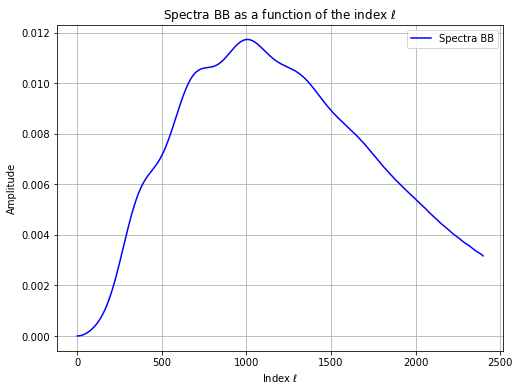

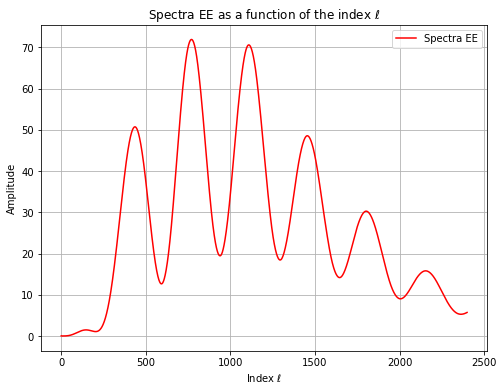

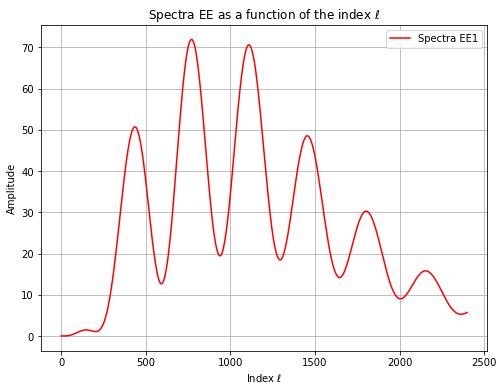

In [6]:
x = [i for i in range(ell_range)]
BB_spectre = BB_EE[0]
EE_spectre = BB_EE[1]

# First figure: Spectra BB
plt.figure(figsize=(8, 6))  
plt.plot(x, BB_spectre, label='Spectra BB', color='blue')  
plt.title('Spectra BB as a function of the index $\\ell$')  
plt.xlabel('Index $\\ell$') 
plt.ylabel('Amplitude')  
plt.legend()  
plt.grid(True)  
plt.show()

# Second figure: Spectra EE
plt.figure(figsize=(8, 6))  
plt.plot(x, EE_spectre, label='Spectra EE', color='red')  
plt.title('Spectra EE as a function of the index $\\ell$')  
plt.xlabel('Index $\\ell$')  
plt.ylabel('Amplitude')  
plt.legend()  
plt.grid(True)  
plt.show()




x1 = [i for i in range(ell_range1)]
EE_spectre1 = BB_EE1[0]

# Second figure: Spectra EE
plt.figure(figsize=(8, 6))  
plt.plot(x, EE_spectre1, label='Spectra EE1', color='red')  
plt.title('Spectra EE as a function of the index $\\ell$')  
plt.xlabel('Index $\\ell$')  
plt.ylabel('Amplitude')  
plt.legend()  
plt.grid(True)  
plt.show()
